In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('scammer_survey_data.csv')

In [3]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,4/17/20 14:23,4/17/20 14:26,0,168.151.100.180,100,207,1,4/17/20 14:26,R_3HLCrMv765B3qLM,NaN,...,7,5,6,6,5,6,7,6,7,6
3,4/17/20 14:23,4/17/20 14:30,0,72.90.152.103,100,419,1,4/17/20 14:30,R_1oHfsxZXAqUS0Ub,NaN,...,7,5,7,4,7,6,7,6,6,6
4,4/17/20 14:25,4/17/20 14:31,0,98.187.130.54,100,318,1,4/17/20 14:31,R_3PsNZfZRlAbS2XF,NaN,...,5,7,5,5,6,5,7,7,6,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 153 entries, StartDate to int_3
dtypes: object(153)
memory usage: 364.7+ KB


In [5]:
df.describe()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
count,305,305,305,300,305,305,305,305,305,2,...,300,300,299,300,299,299,299,300,300,300
unique,105,111,4,295,4,270,4,111,305,2,...,9,9,9,9,9,9,9,9,9,9
top,4/17/20 14:21,4/17/20 14:30,0,73.2.182.75,100,386,1,4/17/20 14:30,R_z6xu1Dy91mpngGJ,Recipient Last Name,...,5,5,5,5,1,1,1,1,1,1
freq,19,8,298,2,302,3,302,8,1,1,...,80,75,83,82,58,69,65,136,137,132


In [6]:
#drop default Qualtrics data columns

df = df.drop(['StartDate', 'EndDate', 'Status','IPAddress','Progress','Duration (in seconds)', 'Finished', 'RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail'], axis=1)

In [7]:
df.head()

,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Consent,Sex,Ethnicity,AgeGroups,Education,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""externalDataReference""}","{""ImportId"":""locationLatitude""}","{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,NaN,40.7144928,-74.00289917,anonymous,EN,1,2,1,2,3,...,7,5,6,6,5,6,7,6,7,6
3,NaN,40.63569641,-74.25270081,anonymous,EN,1,1,2,2,5,...,7,5,7,4,7,6,7,6,6,6
4,NaN,36.35189819,-94.21970367,anonymous,EN,1,1,4,3,5,...,5,7,5,5,6,5,7,7,6,5


In [8]:
df = df.drop(['ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage'], axis=1)

In [9]:
df.describe()

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
count,301,300,300,300,300,300,300,300,300,299,...,300,300,299,300,299,299,299,300,300,300
unique,4,5,9,8,7,7,7,8,9,9,...,9,9,9,9,9,9,9,9,9,9
top,1,1,3,2,3,3,4,2,5,7,...,5,5,5,5,1,1,1,1,1,1
freq,298,190,193,142,150,99,128,99,80,92,...,80,75,83,82,58,69,65,136,137,132


In [10]:
df.head(10)

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,How much time do you spend online on an average?,What level of computing expertise do you have?,What is your annual income?,How risky do you think it is to indulge the fo...,How risky do you think it is to indulge the fo...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID6_1""}","{""ImportId"":""QID6_2""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,1,2,1,2,3,3,3,1,6,7,...,7,5,6,6,5,6,7,6,7,6
3,1,1,2,2,5,3,4,3,5,3,...,7,5,7,4,7,6,7,6,6,6
4,1,1,4,3,5,4,3,2,5,4,...,5,7,5,5,6,5,7,7,6,5
5,1,2,3,1,2,5,4,3,7,7,...,7,7,7,7,7,7,7,6,6,4
6,1,1,2,2,5,5,3,2,4,5,...,6,5,7,5,7,5,7,4,5,5
7,1,1,3,2,5,2,5,4,4,5,...,6,4,4,2,7,2,7,5,4,5
8,1,2,1,2,5,3,1,3,7,6,...,7,6,7,6,7,6,7,5,5,4
9,1,1,6,2,3,5,4,2,6,7,...,7,5,6,6,7,6,7,1,1,1


In [11]:
df

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,How much time do you spend online on an average?,What level of computing expertise do you have?,What is your annual income?,How risky do you think it is to indulge the fo...,How risky do you think it is to indulge the fo...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID6_1""}","{""ImportId"":""QID6_2""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,1,2,1,2,3,3,3,1,6,7,...,7,5,6,6,5,6,7,6,7,6
3,1,1,2,2,5,3,4,3,5,3,...,7,5,7,4,7,6,7,6,6,6
4,1,1,4,3,5,4,3,2,5,4,...,5,7,5,5,6,5,7,7,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#drop any rows where consent was not given
df[df['Consent']=='2']
df = df.drop(axis=0, index=303, level=None, inplace=False, errors='raise')

In [13]:
#Check if it was dropped
df[df['Consent']=='2']

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3


In [14]:
#check df again, because there were some NaN values
df

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,How much time do you spend online on an average?,What level of computing expertise do you have?,What is your annual income?,How risky do you think it is to indulge the fo...,How risky do you think it is to indulge the fo...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID6_1""}","{""ImportId"":""QID6_2""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,1,2,1,2,3,3,3,1,6,7,...,7,5,6,6,5,6,7,6,7,6
3,1,1,2,2,5,3,4,3,5,3,...,7,5,7,4,7,6,7,6,6,6
4,1,1,4,3,5,4,3,2,5,4,...,5,7,5,5,6,5,7,7,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#drop them because they haven't even answered the basic questions and also drop the header rows 0-1
df = df.drop( axis=0, index=[0,1,299,300,301,302,299], level=None, inplace=False, errors='raise')

In [16]:
#the values in df are all string values, convert them to numerics
my_list = list(df)

df_2 = pd.DataFrame()
for i in my_list:
    df_2[i] = pd.to_numeric(df[i])

In [17]:
df_2

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
2,1,2,1,2,3,3,3,1,6,7.0,...,7,5,6.0,6,5.0,6.0,7.0,6,7,6
3,1,1,2,2,5,3,4,3,5,3.0,...,7,5,7.0,4,7.0,6.0,7.0,6,6,6
4,1,1,4,3,5,4,3,2,5,4.0,...,5,7,5.0,5,6.0,5.0,7.0,7,6,5
5,1,2,3,1,2,5,4,3,7,7.0,...,7,7,7.0,7,7.0,7.0,7.0,6,6,4
6,1,1,2,2,5,5,3,2,4,5.0,...,6,5,7.0,5,7.0,5.0,7.0,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,3,4,2,3,4,1,3,5.0,...,5,5,5.0,5,1.0,1.0,1.0,1,1,1
296,1,1,3,2,2,3,4,1,6,7.0,...,5,5,5.0,5,1.0,1.0,1.0,1,1,1
297,1,2,3,5,2,5,5,6,6,7.0,...,6,7,7.0,6,1.0,1.0,1.0,1,1,1
298,1,1,3,6,3,5,4,1,7,7.0,...,5,5,5.0,5,1.0,1.0,1.0,5,4,5


In [18]:
#easier to see all columns by using next statement
print(my_list)

['Consent', 'Sex', 'Ethnicity', 'AgeGroups', 'Education', 'OnlineTime', 'CompExpert', 'Income', 'risk1', 'risk2', 'risk3', 'risk4', 'risk5', 'risk6', 'risk_filler', 'risk_f1', 'risk_f2', 'risk_f3', 'risk_f4', 'risk_f5', 'risk_f6', 'mach1', 'mach2', 'mach3', 'mach4', 'mach5', 'mach6', 'mach7', 'mach8', 'mach9', 'mach10', 'psych1', 'Rpsych2', 'psych3', 'psych4', 'psych5', 'psych6', 'psych7', 'Select_Agree_4', 'Rpsych8', 'psych9', 'psych10', 'psych11', 'psych12', 'psych13', 'risk_s1', 'risk_s2', 'risk_s3', 'risk_s4', 'risk_s5', 'risk_s6', 'CCRI1', 'CCRI2', 'CCRI3', 'CCRI4', 'CCRI5', 'CCRI6', 'CCRI7', 'CCRI8', 'CCRI9', 'CCRI10', 'CCRI11', 'narc_1', 'Rnarc_2', 'narc_3', 'narc_4', 'narc_5', 'Rnarc_6', 'narc_7', 'Rnarc_8', 'narc_9', 'CCRI12', 'CCRI13', 'CCRI14', 'CCRI15', 'CCRI16', 'CCRI17', 'CCRI18', 'CCRI19', 'CCRI20', 'CCRI21', 'soc_p1', 'R_soc_ipc1', 'soc_s1', 'soc_p2', 'soc_ipc2', 'soc_s2', 'R_soc_p3', 'R_soc_ipc3', 'R_soc_s3', 'soc_p4', 'soc_ipc4', 'R_soc_s4', 'soc_p5', 'soc_ipc5', 'soc

In [19]:
#calculate average risk perception for each person
risk_cols = ['risk1', 'risk2', 'risk3', 'risk4', 'risk5', 'risk6', 'risk_f1', 'risk_f2', 'risk_f3', 'risk_f4', 'risk_f5', 'risk_f6', 'risk_s1', 'risk_s2', 'risk_s3', 'risk_s4', 'risk_s5', 'risk_s6']
df_2['Risk_Total'] = df_2[risk_cols].mean(axis=1,skipna=True)

In [20]:
df_2['Risk_Total']
df['Rpsych8']

2      5
3      3
4      5
5      2
6      3
      ..
295    1
296    5
297    5
298    4
304    5
Name: Rpsych8, Length: 298, dtype: object

# Recoding

Notice that some labels have 'R' as a prefix, which indicates that they have been reverse coded. So, subtract 5 or 7 from each observation depending on the codebook we mainted. (Refer to Scale)

* For psychopathy - 

df_2['Rpsych2'] = 5- df_2['Rpsych2']

df_2['Rpsych8'] = 5- df_2['Rpsych8']


* We also must do the same for Narcissism -

df_2['Rnarc_2'] = 5 - df_2['Rnarc_2']

...

* And finally do it for SOC elements - personal control, interpersonal control, socio-political control

* personal_control - fix the reverse coded values

df_2['R_soc_p3'] = 7 - df_2['R_soc_p3']

...

* interpersonal control - fix reverse coded values

df_2['R_soc_ipc1'] = 7 - df_2['R_soc_ipc1']

...

* Socio-political control - fix reverse coded values

df_2['R_soc_s9'] = 7 - df_2['R_soc_s9']

...

This is all too long and tedious to type. I will create a function that will do this called reverse_code_columns()

In [21]:
#Reverse code function:
def reverse_code_columns():
    for i in df_2.columns:
        if 'Rpsych' in i or 'Rnarc_' in i:
            #print(i)
            df_2[i] = 5 - df_2[i]
        if 'R_soc' in i:
            #print(i)
            df_2[i] = 7 - df_2[i]

reverse_code_columns()

Writing the variable codes again and again for every mean calculation will be too tiring, hence, we automate the process - 

In [22]:
cols_m = []
cols_p = []
cols_n = []
for i in df_2.columns:
    if 'mach' in i:
        cols_m.append(i)
    if 'psych' in i:
        cols_p.append(i)
    if 'narc' in i:
        cols_n.append(i)

In [23]:
#Calculate average of Dark Triad Traits for every person

#Mach mean
df_2['Mach_Total'] = df_2[cols_m].mean(axis=1, skipna=True)

#Psych mean
df_2['Psych_Total'] = df_2[cols_p].mean(axis=1, skipna=True)

#Narc mean
df_2['Narc_Total'] = df_2[cols_n].mean(axis=1,skipna=True)


#Spheres of Control Part

#personal control mean
soc_p = []
for i in df_2.columns:
    if 'soc_p' in i:
        soc_p.append(i)
df_2['SOC_pers'] = df_2[soc_p].mean(axis=1,skipna=True)

#interpersonal control mean
#Just manually entering the columns needed here
df_2['SOC_ipc'] = df_2[['R_soc_ipc1', 'soc_ipc2', 'R_soc_ipc3', 'soc_ipc4', 'soc_ipc5', 
                        'R_soc_ipc6', 'soc_ipc7', 'R_soc_ipc8',  'R_soc_ipc9','soc_ipc10']].mean(axis=1,skipna=True)

#Socio-political control mean
#Just manually entering the columns needed here
df_2['SOC_spc'] = df_2[['soc_s1','soc_s2','R_soc_s3','R_soc_s4', 'soc_s5',
                        'soc_s6', 'R_soc_s7', 'R_soc_s8','R_soc_s9', 'soc_10']].mean(axis=1,skipna=True)

#Find Total Score for CCRI
ccri = []
for i in df_2.columns:
    if 'CCRI' in i:
        ccri.append(i)
        
df_2['Total_CCRI'] = df_2[ccri].sum(axis=1, skipna=True)

In [24]:
#Fraud Diamond Elements and Intent

df_2['Motivation'] = df_2[['mot_1', 'mot_2', 'mot_3']].mean(axis=1, skipna=True)
df_2['Opportunity'] = df_2[['opp_1', 'opp_2', 'opp_3']].mean(axis=1,skipna=True)
df_2['Capability'] = df_2[['cap_1', 'cap_2', 'cap_3']].mean(axis=1,skipna=True)
df_2['Rationalization'] = df_2[['rat_1', 'rat_2', 'rat_3']].mean(axis=1,skipna=True)
df_2['Intent'] = df_2[['int_1', 'int_2', 'int_3']].mean(axis=1,skipna=True)

In [25]:
df_2 = df_2.drop(['Consent','risk1', 'risk2', 'risk3', 'risk4', 'risk5', 'risk6', 'risk_filler', 'risk_f1', 'risk_f2', 'risk_f3', 'risk_f4', 'risk_f5', 'risk_f6', 'mach1', 'mach2', 'mach3', 'mach4', 'mach5', 'mach6', 'mach7', 'mach8', 'mach9', 'mach10', 'psych1', 'Rpsych2', 'psych3', 'psych4', 'psych5', 'psych6', 'psych7', 'Select_Agree_4', 'Rpsych8', 'psych9', 'psych10', 'psych11', 'psych12', 'psych13', 'risk_s1', 'risk_s2', 'risk_s3', 'risk_s4', 'risk_s5', 'risk_s6', 'CCRI1', 'CCRI2', 'CCRI3', 'CCRI4', 'CCRI5', 'CCRI6', 'CCRI7', 'CCRI8', 'CCRI9', 'CCRI10', 'CCRI11', 'narc_1', 'Rnarc_2', 'narc_3', 'narc_4', 'narc_5', 'Rnarc_6', 'narc_7', 'Rnarc_8', 'narc_9', 'CCRI12', 'CCRI13', 'CCRI14', 'CCRI15', 'CCRI16', 'CCRI17', 'CCRI18', 'CCRI19', 'CCRI20', 'CCRI21', 'soc_p1', 'R_soc_ipc1', 'soc_s1', 'soc_p2', 'soc_ipc2', 'soc_s2', 'R_soc_p3', 'R_soc_ipc3', 'R_soc_s3', 'soc_p4', 'soc_ipc4', 'R_soc_s4', 'soc_p5', 'soc_ipc5', 'soc_s5', 'CCRI22', 'CCRI23', 'CCRI24', 'CCRI25', 'CCRI26', 'CCRI27', 'CCRI28', 'CCRI29', 'CCRI30', 'R_soc_p6', 'R_soc_ipc6', 'soc_s6', 'R_soc_p7', 'soc_ipc7', 'R_soc_s7', 'soc_p7', 'R_soc_ipc8', 'R_soc_s8', 'R_soc_p9', 'R_soc_ipc9', 'R_soc_s9', 'R_soc_p10', 'Attention_Check_4', 'soc_10', 'soc_ipc10', 'mot_1', 'mot_2', 'mot_3', 'opp_1', 'opp_2', 'opp_3', 'cap_1', 'cap_2', 'cap_3', 'rat_1', 'rat_2', 'rat_3', 'int_1', 'int_2', 'int_3'], axis=1)

In [26]:
df_2.head()

,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,Risk_Total,Mach_Total,Psych_Total,Narc_Total,SOC_pers,SOC_ipc,SOC_spc,Total_CCRI,Motivation,Opportunity,Capability,Rationalization,Intent
2,2,1,2,3,3,3,1,5.777778,4.111111,4.076923,2.750000,3.1,3.1,3.300000,205.0,6.333333,6.333333,5.666667,6.000000,6.333333
3,1,2,2,5,3,4,3,4.888889,3.800000,3.846154,2.555556,3.7,2.8,3.600000,204.0,5.333333,6.333333,5.333333,6.666667,6.000000
4,1,4,3,5,4,3,2,5.444444,4.000000,3.307692,2.666667,3.1,4.1,2.888889,207.0,5.333333,5.666667,5.666667,6.000000,6.000000
5,2,3,1,2,5,4,3,4.166667,4.200000,2.538462,4.666667,6.1,6.1,3.700000,221.0,7.000000,7.000000,7.000000,7.000000,5.333333
6,1,2,2,5,5,3,2,5.500000,4.200000,4.076923,3.555556,3.5,3.7,3.500000,193.0,6.000000,6.000000,5.666667,6.333333,4.666667


In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 2 to 304
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              298 non-null    int64  
 1   Ethnicity        298 non-null    int64  
 2   AgeGroups        298 non-null    int64  
 3   Education        298 non-null    int64  
 4   OnlineTime       298 non-null    int64  
 5   CompExpert       298 non-null    int64  
 6   Income           298 non-null    int64  
 7   Risk_Total       298 non-null    float64
 8   Mach_Total       298 non-null    float64
 9   Psych_Total      298 non-null    float64
 10  Narc_Total       298 non-null    float64
 11  SOC_pers         298 non-null    float64
 12  SOC_ipc          298 non-null    float64
 13  SOC_spc          298 non-null    float64
 14  Total_CCRI       298 non-null    float64
 15  Motivation       298 non-null    float64
 16  Opportunity      298 non-null    float64
 17  Capability      

In [28]:
df_2.corr()

,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,Risk_Total,Mach_Total,Psych_Total,Narc_Total,SOC_pers,SOC_ipc,SOC_spc,Total_CCRI,Motivation,Opportunity,Capability,Rationalization,Intent
Sex,1.000000,0.046051,0.022443,-0.071431,0.046730,-0.078173,-0.077496,0.105493,-0.045267,-0.172757,-0.069162,0.085280,0.107109,-0.016278,0.199207,0.027420,0.025790,-0.054996,-0.131913,-0.060910
Ethnicity,0.046051,1.000000,0.003497,-0.053054,0.007058,-0.044443,0.004641,-0.069101,-0.007805,-0.035015,-0.052427,0.069766,0.018100,-0.028440,0.019883,0.017211,-0.041313,-0.077581,-0.028120,0.103791
AgeGroups,0.022443,0.003497,1.000000,-0.012003,0.084570,0.036911,0.025867,-0.016612,-0.155794,-0.197410,-0.101558,0.054631,0.130243,-0.055605,0.080839,-0.078246,-0.019178,-0.067521,-0.176369,0.128779
Education,-0.071431,-0.053054,-0.012003,1.000000,-0.204571,0.043660,0.293528,0.101926,0.174293,0.299381,0.199193,-0.093325,-0.079003,0.079994,-0.264495,0.062966,0.074343,0.078360,0.258959,0.100179
OnlineTime,0.046730,0.007058,0.084570,-0.204571,1.000000,0.280047,-0.090078,-0.012563,-0.155320,-0.395161,-0.263211,0.186182,0.043378,-0.074358,0.373703,0.058639,-0.012671,-0.088830,-0.303559,-0.102271
CompExpert,-0.078173,-0.044443,0.036911,0.043660,0.280047,1.000000,0.095958,-0.021249,-0.062675,-0.176161,-0.024239,0.209194,0.125260,0.109342,0.249824,-0.005279,-0.071551,-0.007590,-0.086787,-0.073007
Income,-0.077496,0.004641,0.025867,0.293528,-0.090078,0.095958,1.000000,0.067744,0.149864,0.101175,0.211211,0.064314,0.057535,0.115385,-0.072469,0.074337,0.049753,0.095648,0.123472,0.037191
Risk_Total,0.105493,-0.069101,-0.016612,0.101926,-0.012563,-0.021249,0.067744,1.000000,0.298322,0.280382,0.128929,-0.110432,-0.108907,0.008514,-0.171349,0.110825,0.238471,0.189266,0.284264,0.042454
Mach_Total,-0.045267,-0.007805,-0.155794,0.174293,-0.155320,-0.062675,0.149864,0.298322,1.000000,0.628595,0.540055,-0.231699,-0.150224,-0.034570,-0.327703,0.429817,0.394997,0.505249,0.547233,0.091700
Psych_Total,-0.172757,-0.035015,-0.197410,0.299381,-0.395161,-0.176161,0.101175,0.280382,0.628595,1.000000,0.609733,-0.477881,-0.286791,0.014409,-0.693630,0.286670,0.299801,0.426214,0.716516,0.180228


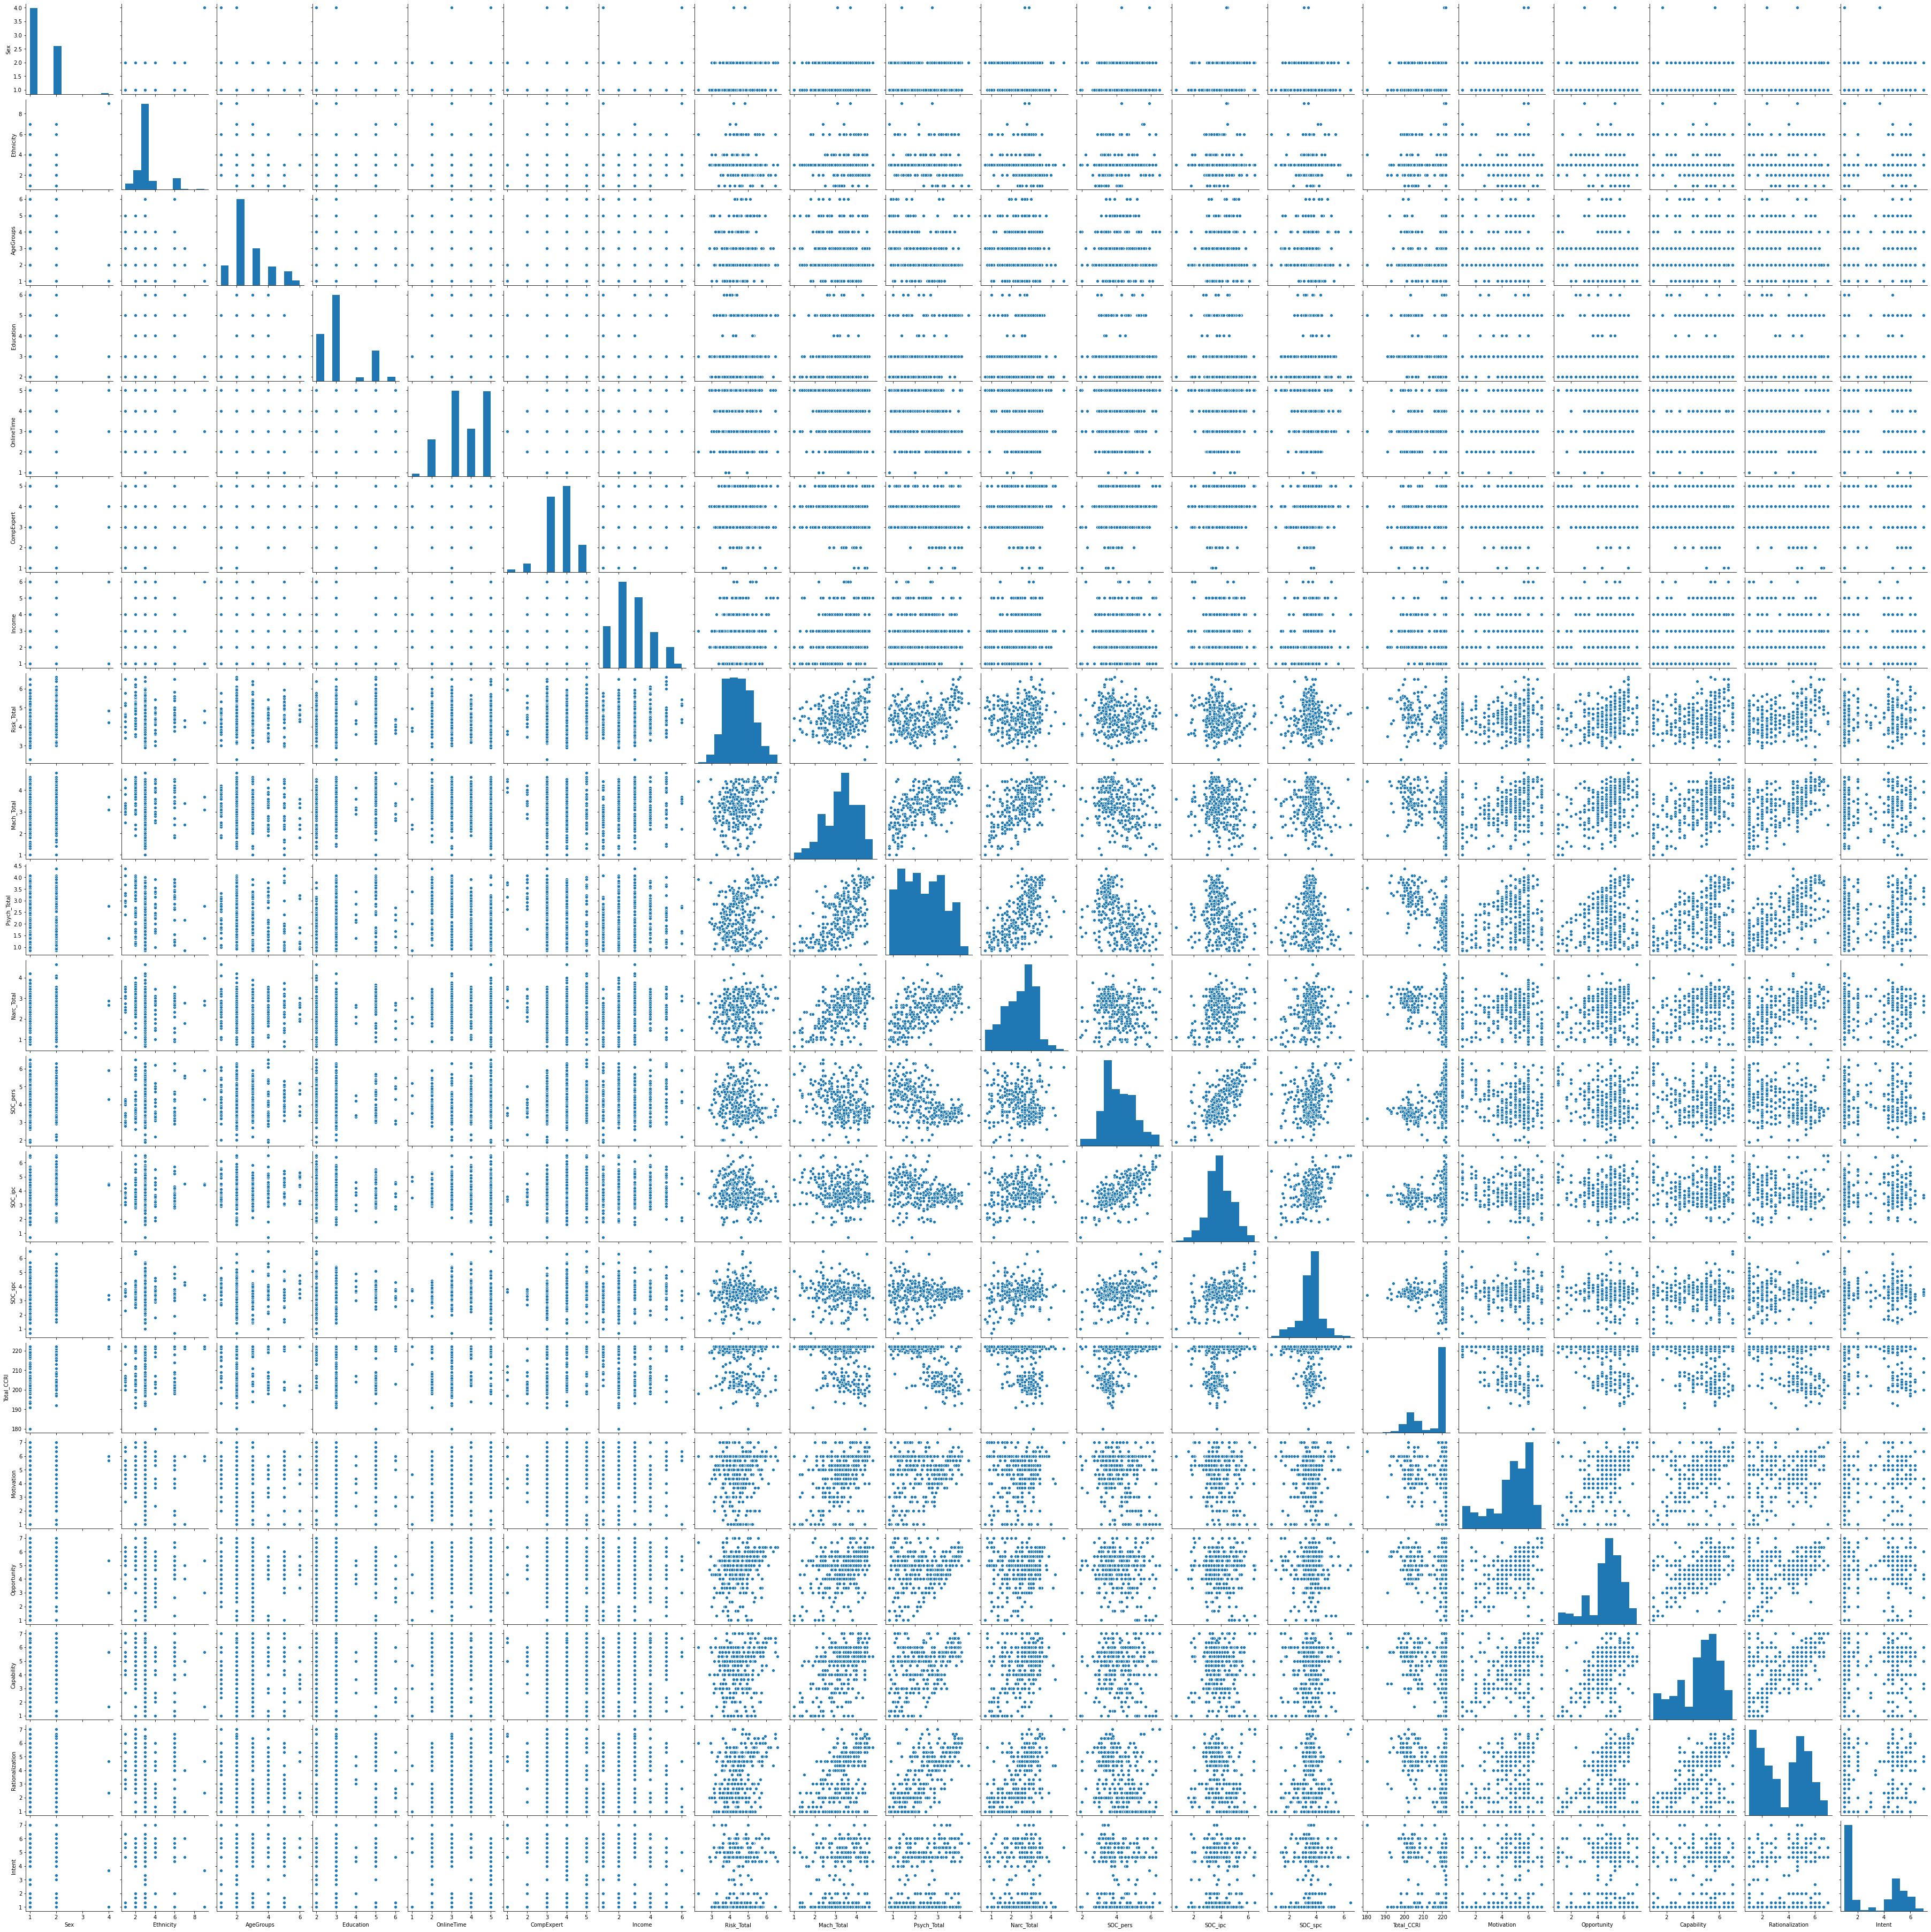

In [29]:
sns.pairplot(df_2).figsize=(50,50)  
#Takes time

In [30]:
#Let's create a categorical variable called "Cyber-Scammer or Not"
#However, Qualtrics messed up the coding for these variables, so we will need to do something tricky here
#CCRI1 - CCRI11 : 1 - Yes, 2 - No 
#CCRI12 - CCRI21: 1 - Yes, 2 - No
#CCRI22 - CCRI30: 19 - Yes, 20 - No
#So if someone has almost never indulged in cyberscamming, we shall have their row sum = (2*21 + 9*20) -1 = 221
#Others should be labelled as non-cyberscammers

df_2.loc[(df_2.Total_CCRI < 221), 'Total_CCRI']= 1
df_2.loc[(df_2.Total_CCRI >= 221),'Total_CCRI']= 0
df_2['Total_CCRI'].value_counts()

#Here, if Total_CCRI == 0 then they are NOT classified as cyberscammers.

0.0    155
1.0    143
Name: Total_CCRI, dtype: int64

In [31]:
df_2.loc[(df_2.Total_CCRI == 1), 'CS_vs_Non']= 'CyberScammer'
df_2.loc[(df_2.Total_CCRI == 0), 'CS_vs_Non']= 'Non-CyberScammer'
df_2['CS_vs_Non'].value_counts()

Non-CyberScammer    155
CyberScammer        143
Name: CS_vs_Non, dtype: int64

# Hypothesis Testing

In [32]:
#This code will be used to perform hypothesis testing for each of the 6 hypotheses.

def test_hypothesis(frame1, frame2):
    #pearson correlation
    print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(frame1), y=np.asarray(frame2)))
    
    #define a LR model
    lm = LinearRegression()
    lm.fit(np.asarray(frame1).reshape(-1,1), np.asarray(frame2).reshape(-1,1))
    print("R^2 - ",lm.score(np.asarray(frame1).reshape(-1,1), np.asarray(frame2).reshape(-1,1)))
    print("Regression Coefficients:",lm.coef_)
    
    #plot the linear regression 
    sns.set_style('whitegrid')
    sns.lmplot(x=frame1.name,y=frame2.name,data=df_2)

Preason Correlation and p-value =  (-0.15022386435714918, 0.009400870655371983)
R^2 -  0.022567209422395207
Regression Coefficients: [[-0.17548442]]


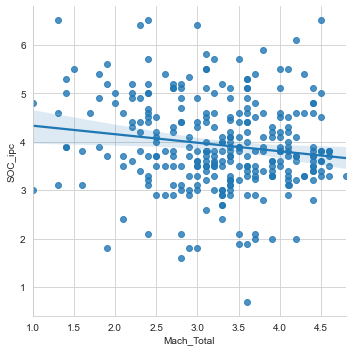

In [33]:
#Hypothesis Testing:
#H1. A. Machiavellianism will have a positive relation with interpersonal control.

test_hypothesis(df_2['Mach_Total'], df_2['SOC_ipc'])

Preason Correlation and p-value =  (-0.03457034452968579, 0.5522136566773052)
R^2 -  0.0011951087209011169
Regression Coefficients: [[-0.03388357]]


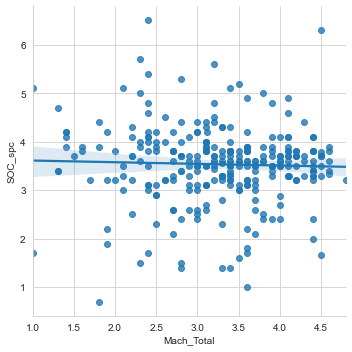

In [34]:
#H1. B. Machiavellianism will have a negative relation with socio-political control.
test_hypothesis(df_2['Mach_Total'],df_2['SOC_spc'])

Preason Correlation and p-value =  (0.29832248169942227, 1.5360379785344648e-07)
R^2 -  0.08899630308730233
Regression Coefficients: [[0.28090466]]


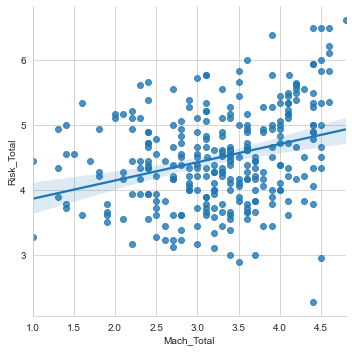

In [35]:
#H2. A. Perceived risk will be negatively related with Machiavellianism
test_hypothesis(df_2['Mach_Total'],df_2['Risk_Total'])

Preason Correlation and p-value =  (0.2803816461808219, 8.707180443878014e-07)
R^2 -  0.07861386751506771
Regression Coefficients: [[0.23369315]]


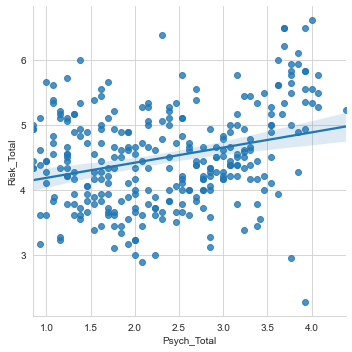

In [36]:
#H2. B. Perceived risk will be negatively related with Psychopathy
test_hypothesis(df_2['Psych_Total'], df_2['Risk_Total'])

Preason Correlation and p-value =  (0.23847081003597917, 3.1893369868283314e-05)
R^2 -  0.05686832723921609
Regression Coefficients: [[0.415968]]


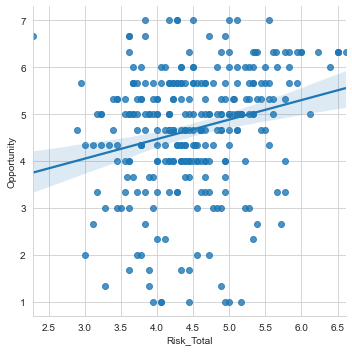

In [37]:
#H2. C. Perceived risk will be positively related to the scammers perceived opportunity to commit scams.
test_hypothesis(df_2['Risk_Total'],df_2['Opportunity'])

Preason Correlation and p-value =  (0.12892858594931253, 0.02604130456173325)
R^2 -  0.016622580274889498
Regression Coefficients: [[0.12597486]]


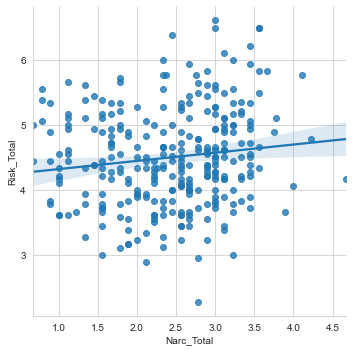

In [38]:
#H3. A. Narcissism will be positively related to perceived capabilities of the individual H3. B. Narcissism will be positively related to motivation of the individual

test_hypothesis(df_2['Narc_Total'], df_2['Risk_Total'])

Preason Correlation and p-value =  (0.3949972310103023, 1.4411918014787544e-12)
R^2 -  0.1560228125058063
Regression Coefficients: [[0.64877142]]


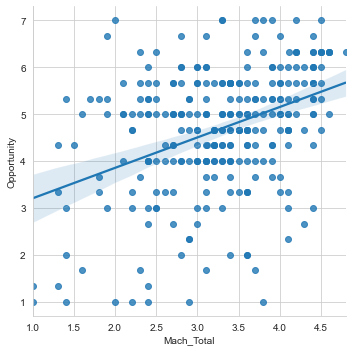

In [39]:
#H4. A. Machiavellianism (Mach) will be negatively related to an individual’s perception of an opportunity to commit an online scam.

test_hypothesis(df_2['Mach_Total'],df_2['Opportunity'])

Preason Correlation and p-value =  (0.42981734613916406, 7.90730018710712e-15)
R^2 -  0.18474295104211402
Regression Coefficients: [[0.82579614]]


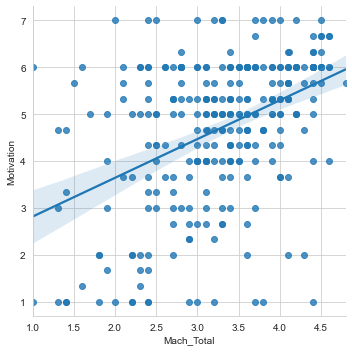

In [40]:
#H4. B. Mach will be positively related to an individuals’ motivation to commit an online scam.

test_hypothesis(df_2['Mach_Total'],df_2['Motivation'])

Preason Correlation and p-value =  (0.7165156584333355, 3.247163623717998e-48)
R^2 -  0.5133946887801561
Regression Coefficients: [[1.40836703]]


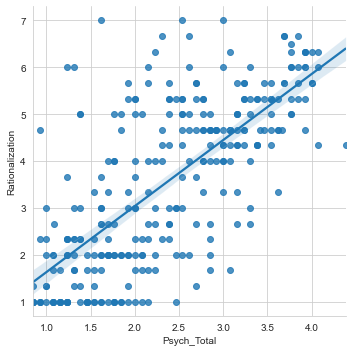

In [41]:
#H5. Psychopathy will be positively related to the willingness to rationalize an act of online fraud.

test_hypothesis(df_2['Psych_Total'],df_2['Rationalization'])


Preason Correlation and p-value =  (0.12477658440222328, 0.03129138605954854)
R^2 -  0.015569196015084996
Regression Coefficients: [[0.14283857]]


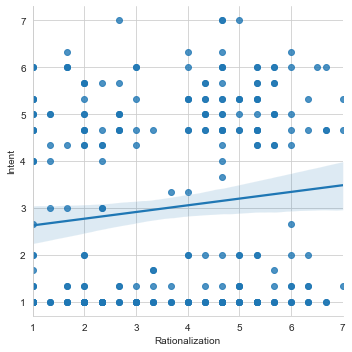

In [42]:
#H6: An individuals’ willingness to rationalize an act of fraud will be positively related with their intent to commit fraud.

test_hypothesis(df_2['Rationalization'],df_2['Intent'])


In [63]:
#Save data to the file, we will read it to do structural equation modeling in R as it has better documentation online.
df_2.to_csv(r'cleaned_data.csv', index = False)